## Data Retrieval

Getting the shape files for census tracts in Los Angeles

In [0]:
!wget -Nq http://egis3.lacounty.gov/dataportal/wp-content/uploads/ShapefilePackages/CENSUS_TRACTS_2010.zip
!unzip -o CENSUS_TRACTS_2010.zip
!ls -lah

Archive:  CENSUS_TRACTS_2010.zip
  inflating: CENSUS_TRACTS_2010.cpg  
  inflating: CENSUS_TRACTS_2010.dbf  
  inflating: CENSUS_TRACTS_2010.prj  
  inflating: CENSUS_TRACTS_2010.sbn  
  inflating: CENSUS_TRACTS_2010.sbx  
  inflating: CENSUS_TRACTS_2010.shp  
  inflating: CENSUS_TRACTS_2010.shp.xml  
  inflating: CENSUS_TRACTS_2010.shx  
total 8.9M
drwxr-xr-x 1 root root 4.0K Mar 24 20:36 .
drwxr-xr-x 1 root root 4.0K Mar 24 20:35 ..
-rw-rw-rw- 1 root root    5 Jan 26  2016 CENSUS_TRACTS_2010.cpg
-rw-rw-rw- 1 root root 232K Jan 26  2016 CENSUS_TRACTS_2010.dbf
-rw-rw-rw- 1 root root  565 Jan 26  2016 CENSUS_TRACTS_2010.prj
-rw-rw-rw- 1 root root  23K Jan 26  2016 CENSUS_TRACTS_2010.sbn
-rw-rw-rw- 1 root root 1012 Jan 26  2016 CENSUS_TRACTS_2010.sbx
-rw-rw-rw- 1 root root 5.1M Jan 26  2016 CENSUS_TRACTS_2010.shp
-rw-rw-rw- 1 root root  48K Jan 26  2016 CENSUS_TRACTS_2010.shp.xml
-rw-rw-rw- 1 root root  19K Jan 26  2016 CENSUS_TRACTS_2010.shx
-rw-r--r-- 1 root root 3.5M Jan 26  2016 CENS

Getting the excel file for LA metro ridership

In [0]:
!wget -Nq http://libraryarchives.metro.net/DPGTL/Ridership/RailActivityByStationFY2017.xlsx
!wget -Nq http://libraryarchives.metro.net/DPGTL/Ridership/RailActivityByStationFY2014.xls
!wget -Nq http://libraryarchives.metro.net/DPGTL/Ridership/RailActivityByStationFY2010.xls
!ls -lah

total 9.3M
drwxr-xr-x 1 root root 4.0K Mar 24 20:36 .
drwxr-xr-x 1 root root 4.0K Mar 24 20:35 ..
-rw-rw-rw- 1 root root    5 Jan 26  2016 CENSUS_TRACTS_2010.cpg
-rw-rw-rw- 1 root root 232K Jan 26  2016 CENSUS_TRACTS_2010.dbf
-rw-rw-rw- 1 root root  565 Jan 26  2016 CENSUS_TRACTS_2010.prj
-rw-rw-rw- 1 root root  23K Jan 26  2016 CENSUS_TRACTS_2010.sbn
-rw-rw-rw- 1 root root 1012 Jan 26  2016 CENSUS_TRACTS_2010.sbx
-rw-rw-rw- 1 root root 5.1M Jan 26  2016 CENSUS_TRACTS_2010.shp
-rw-rw-rw- 1 root root  48K Jan 26  2016 CENSUS_TRACTS_2010.shp.xml
-rw-rw-rw- 1 root root  19K Jan 26  2016 CENSUS_TRACTS_2010.shx
-rw-r--r-- 1 root root 3.5M Jan 26  2016 CENSUS_TRACTS_2010.zip
drwxr-xr-x 1 root root 4.0K Mar  8 17:25 .config
-rw-r--r-- 1 root root 104K Aug 11  2010 RailActivityByStationFY2010.xls
-rw-r--r-- 1 root root 200K Jul 17  2014 RailActivityByStationFY2014.xls
-rw-r--r-- 1 root root  95K Jan 23  2018 RailActivityByStationFY2017.xlsx
drwxr-xr-x 1 root root 4.0K Mar  8 17:26 sample_data


## Importing Packages in Python

Importing relevant packages in Python, such as RTree

In [0]:
!apt-get install python3-rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 10 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg

Fiona and Shapely

In [0]:
!pip install fiona shapely

    100% |████████████████████████████████| 17.9MB 1.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


## Importing within Python

In [0]:
%matplotlib inline
import sys, os, time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import fiona
import shapely
import shapely.geometry
import rtree

Open LA census tracts using Fiona

## Reading LA metro ridership information from Excel
We extract the latitude and longtitude information for each metro station from the data. Right now we're interested in the geocoordinates of the metro station so that we can identify which census tracts are within a certain radius of each metro station.

In [0]:
# Creating dataframe from reading and parsing a sheet in excel
blue_ridership_df = pd.read_excel("RailActivityByStationFY2017.xlsx", sheet_name="Blue Line")
# blue_ridership_df.head(10)
# Taking only the columns of interest (latitude and longitude)
blue_ridership_df_geocoord = blue_ridership_df[['Latitude', 'Longitude']]
# Printing out the first 20 elements
blue_ridership_df_geocoord.head(20)

red_ridership_df = pd.read_excel("RailActivityByStationFY2017.xlsx", sheet_name="Red Line")
# red_ridership_df.head(10)
red_ridership_df_geocoord = red_ridership_df[['Latitude', 'Longitude']]
red_ridership_df_geocoord.head(20)

expo_ridership_df = pd.read_excel("RailActivityByStationFY2017.xlsx", sheet_name="Expo Line")
# expo_ridership_df.head(10)
expo_ridership_df_geocoord = expo_ridership_df[['Latitude', 'Longitude']]
expo_ridership_df_geocoord.head(20)

green_ridership_df = pd.read_excel("RailActivityByStationFY2017.xlsx", sheet_name="Green Line")
# green_ridership_df.head(10)
green_ridership_df_geocoord = green_ridership_df[['Latitude', 'Longitude']]
green_ridership_df_geocoord.head(20)
green_ridership_df[['Average_Daily_Boardings']].head(20)

gold_ridership_df = pd.read_excel("RailActivityByStationFY2017.xlsx", sheet_name="Gold Line")


Visualizing the Metro Data

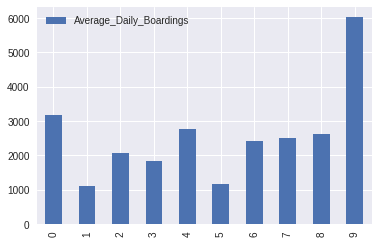

In [0]:
blue_ridership_df[0:10][["Average_Daily_Boardings"]].plot.bar()

## Extracting information from Older Metro Excel 

Since the data format for older metro ridership information is different, we need to do more data cleaning in order to read in the data.

In [0]:
#movies_skip_rows = pd.read_excel("movies-no-header-skip-rows.xls", header=None, skiprows=4)
blue_ridership_14_df = pd.read_excel("RailActivityByStationFY2014.xls", sheet_name="Blue Line", skiprows=6, skipcols=3, header=None)
#movies_skip_rows.columns = ['Title', 'Year', 'Genres
blue_ridership_14_df.columns = ["Temp1", "Temp2", "Temp3", "Station", "Daily Boardings", "Daily Alightings",
                                "Yearly Boardings", "Yearly Alightings", "Stop", 
                                "Latitude", "Longitude"]
blue_ridership_14_df.drop(columns=["Temp1", "Temp2", "Temp3"], inplace=True)
blue_ridership_14_df.head(5)

,Station,Daily Boardings,Daily Alightings,Yearly Boardings,Yearly Alightings,Stop,Latitude,Longitude
0,TRANSIT MALL,3647.283863,NaN,930057.385020,NaN,80101.0,33.768071,-118.192921
1,PACIFIC,1402.007093,272.830833,357511.808667,69571.862540,80102.0,33.772258,-118.193700
2,ANAHEIM,2586.072773,484.277785,659448.557059,123490.835280,80105.0,33.781830,-118.189384
3,PACIFIC COAST HIGHWAY,2189.167504,762.143968,558237.713406,194346.711729,80106.0,33.789090,-118.189382
4,WILLOW,2751.614156,760.174282,701661.609775,193844.442014,80107.0,33.807079,-118.189834


## Visualizing Metro Data

Using Matplotlib to visualize data

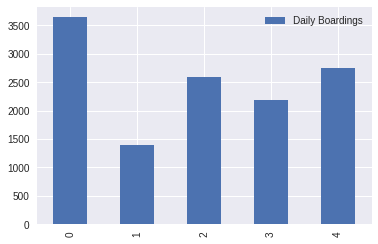

In [0]:
blue_ridership_boarding_14_df = blue_ridership_14_df[["Daily Boardings"]]
# blue_ridership_boarding_14_df = blue_ridership_boarding_14_df.set_index(["Station"])
blue_ridership_boarding_14_df[0:5].plot.bar()

Displays keys of the dictionary

## Spatial Indexing

We can identify which metro stations belong to which census tract using Rtree's spatial indexing

In [0]:
# initialize rtree spatial index
tract_index = rtree.index.Index()

**Shapefile and Census data mapped across tracts**

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import os
os.listdir("/gdrive/Team Drives/CSCI499 Final Proj /tl_2018_06_tract/")

['tl_2018_06_tract.shx',
 'tl_2018_06_tract.prj',
 'tl_2018_06_tract.shp.iso.xml',
 'tl_2018_06_tract.cpg',
 'tl_2018_06_tract.dbf',
 'tl_2018_06_tract.shp.ea.iso.xml',
 'tl_2018_06_tract.shp']

In [0]:
import sys, time                                                                                                                                                                                        
from io import StringIO                                                                                                                                                                                     
xrange = range                                                                                                                                                                                              
from tokenize import generate_tokens                                                                                                                                                                        
                                                                                                                                                                                                            
                                                                                                                                                                                                            
import fiona                                                                                                                                                                                                
import shapely                                                                                                                                                                                              
import shapely.geometry                                                                                                                                                                                     
import rtree                                                                                                                                                                                                
                                                                                                                                                                                                            
import numpy as np                                                                                                                                                                                          
import pandas as pd                                                                                                                                                                                         
import math     
from math import sqrt
                                                                                                                                                                                                      
from sklearn.model_selection import train_test_split                                                                                                                                                        
                                                                                                                                                                                                            
from sklearn.linear_model import LinearRegression                                                                                                                                                           
from sklearn.linear_model import Ridge                                                                                                                                                                      
from sklearn.linear_model import Lasso                                                                                                                                                                      
from sklearn.linear_model import ElasticNet                                                                                                                                                                 
from sklearn.metrics import mean_squared_error                                                                                                                                                              
                                                                                                                                                                                                            
from sklearn.preprocessing import PolynomialFeatures                                                                                                                                                        
from sklearn.pipeline import Pipeline                                                                                                                                                                       
from sklearn.preprocessing import StandardScaler                                                                                                                                                            
                                                                                                                                                                                                            
import matplotlib.pyplot as plt                                                                                                                                                                             
                                                                                                                                                                                                            
# open shapefile with fiona                                                                                                                                                                                 
with fiona.open("/gdrive/Team Drives/CSCI499 Final Proj /tl_2018_06_tract/tl_2018_06_tract.shp", "r") as f:                                                                                                                                         
      # get first item in shape iterator                                                                                                                                                                    
      it = iter(f)                                                                                                                                                                                          
      example_data = next(it)                                                                                                                                                                               
      print("fiona parsed us an object of type:", type(example_data))                                                                                                                                       
                                                                                                                                                                                                            
print("Keys specifying shape info", example_data.keys())                                                                                                                                                    
                                                                                                                                                                                                            
print("keys:", example_data["geometry"].keys())                                                                                                                                                             
print("coordinates:", example_data["geometry"]["coordinates"])                                                                                                                                              
max_coord = max(example_data["geometry"]["coordinates"])                                                                                                                                                    
min_coord = min(example_data["geometry"]["coordinates"])                                                                                                                                                    
                                                                                                                                                                                                            
print("type:", example_data["geometry"]["type"])                                                                                                                                                            
                                                                                                                                                                                                            
print("keys:", example_data["properties"].keys())                                                                                                                                                           
for k in example_data["properties"].keys():                                                                                                                                                                 
      print(example_data["properties"][k])                                                                                                                                                                  
                                                                                                                                                                                                            
print("geoid:", example_data["properties"]["GEOID"])                                                                                                                                                        
la_shapes = list()                                                                                                                                                                                          
with fiona.open("/gdrive/Team Drives/CSCI499 Final Proj /tl_2018_06_tract/tl_2018_06_tract.shp", "r") as f:                                                                                                                                         
     # print("orig len", len(f))                                                                                                                                                                             
      for shape in f:                                                                                                                                                                                       
            if shape["properties"]["STATEFP"]=='06' and shape["properties"]["COUNTYFP"]=='037':                                                                                                             
                  la_shapes.append(shape)      

census_tract_data = {}                                                                                                                                                                                      
# open the census data for reading                                                                                                                                                                          
with open("/gdrive/Team Drives/CSCI499 Final Proj /new.csv", "r") as f: # awful filename                                                                                                                                                
  # parse out header                                                                                                                                                                                    
  p = f.readline().replace(","," ").split()                                                                                                                                                             
  print('p1', p)                                                                                                                                                                                        
                                                                                                               
  header = p                                                                                                                                                                                            
  f.readline()                                                                                                                                                                                          
# iterate over remaining lines                                                                                                                                                                        
  for line in f:                                                                                                                                                                                        
      # get value in each cell                                                                                                                                                                        
     # print("L",line)                                                                                                                                                                                 
#            parts = line.replace(",","\t").split("\t")                                                                                                                                                     

      compos = [-1] # compos stores the positions of the relevant commas in the argument string                                                                                                       
      compos.extend(t[2][1] for t in generate_tokens(StringIO(line).readline) if t[1] == ',')                                                                                                         
      compos.append(len(line))                                                                                                                                                                        
      parts = [ line[compos[i]+1:compos[i+1]] for i in xrange(len(compos)-1)]                                                                                                                         
                                                                                                                                                             
      assert len(header) == len(parts)                                                                                                                                                                
      # create dictionary tracking data                                                                                                                                                               
      line = dict(zip(header, parts))                                                                                                                                                                 
      #print(line)                                                                                                                                                                                     
      # add to file using FIPS name                                                                                                                                                                                                                                                                                                                                          
      census_tract_data[line['Geo_TRACT']] = line                                                                                                                                                     


print(header)                                                                                                                                                                                               

la_shapes_ids = map(lambda x:x[0], la_shapes)  

fiona parsed us an object of type: <class 'dict'>
Keys specifying shape info dict_keys(['type', 'id', 'properties', 'geometry'])
keys: dict_keys(['type', 'coordinates'])
coordinates: [[(-118.581186, 34.143176), (-118.580994, 34.143341), (-118.580899, 34.143571), (-118.580927, 34.143786), (-118.580891, 34.144047), (-118.58094, 34.14423), (-118.580847, 34.14443), (-118.580915, 34.144628), (-118.580912, 34.144997), (-118.580214, 34.145547), (-118.580124, 34.145652999999996), (-118.580072, 34.145738), (-118.580036, 34.145829), (-118.580018, 34.145922999999996), (-118.580013, 34.146277999999995), (-118.579994, 34.147815), (-118.579988, 34.148282), (-118.57996800000001, 34.149885999999995), (-118.579955, 34.150079999999996), (-118.57983300000001, 34.151289), (-118.579702, 34.152585), (-118.579639, 34.153175), (-118.579521, 34.154343), (-118.579411, 34.155438), (-118.579311, 34.156435), (-118.579205, 34.157481), (-118.577684, 34.157498), (-118.577584, 34.157508), (-118.577427, 34.157536), (-1

In [0]:
FACTOR = 68.75                                                                                                                                                                                        
RADIUS = 3

def getNearbyTrafficIntersections(lat, lon):
  lat = lat*FACTOR                                                                                                                                                                                      
  lon = lon*FACTOR                                                                                                                                                                                      
  
  nearbyIntersections = list()
  
  traffic_df = pd.read_csv("/gdrive/Team Drives/CSCI499 Final Proj /LADOT_Traffic_Counts_Summary_w_latLong.csv")
  #print(traffic_df.head())
  
  for index, row in traffic_df.iterrows():
    curr_lat = float(row["LAT"])*FACTOR
    curr_lon = float(row["LONG"])*FACTOR
    if sqrt((lat-curr_lat)**2 + (lon-curr_lon)**2)<=RADIUS:
      #print(row["Total"])
      nearbyIntersections.append(row["Total"])
  
  return nearbyIntersections

Function 

## Creating Training Dataset

For each metro station, we draw a 3 mile radius: within that radius, we find which census tract belongs to that station and average the household income data and population density data, and also the number of traffic counts that's inside the tract. 

In [0]:
  
# Function that takes lat, long and returns list of census 
# tracts near station
def getNearbyCensusTracts(lat, lon):                                                                                                                                                                        
                                                                                                                                                                                                
      lat = lat*FACTOR                                                                                                                                                                                      
      lon = lon*FACTOR                                                                                                                                                                                      
                                                                                                                                                                                                            
      nearby_shapes = list()                                                                                                                                                                                
                                                                                                                                                                                                            
      for s in la_shapes:                                                                                                                                                                                   
            curr_lat = float(s["properties"]["INTPTLAT"])*FACTOR                                                                                                                                            
            curr_lon = float(s["properties"]["INTPTLON"])*FACTOR                                                                                                                                            
            if sqrt((lat-curr_lat)**2 + (lon-curr_lon)**2)<=RADIUS:
            #if abs(lat-curr_lat)<=RADIUS and abs(lon-curr_lon)<=RADIUS:                                                                                                                                     
#                  print("lat diff: ", abs(lat-curr_lat), " and long diff: ", abs(lon-curr_lon))                                                                                                            
 #                 print("lat:", curr_lat,  "long:", curr_lon)                                                                                                                                              
                  nearby_shapes.append(s)                  
      
      return nearby_shapes



  
x_train = []
x_stations = []

# Blue Line
for index, row in blue_ridership_df.iterrows():
  print(row["Station"])
  num_census_tracts = 0
  household_income_sum = 0
  population_density_sum = 0
  traffic_sum = 0
  (lat, long) = (row["Latitude"], row["Longitude"])
  #print(lat, long)
  x_stations.append(row["Station"])
  
  nearby_tracts = getNearbyCensusTracts(lat,long)
  nearby_intersections = getNearbyTrafficIntersections(lat,long)
  
  pop_densities = list()
  avg_household_incomes = list()
  
                                                                                                                                                                              

  for tract in nearby_tracts:
    tract_num_key = '"{}"'.format(str(tract["properties"]["TRACTCE"]))
    #print("NUM: ", tract_num_key)
    
    pop_density = float(census_tract_data[tract_num_key]['SE_A00002_002'])
    pop_densities.append(pop_density)
    #print("PD:",pop_density)
    
    income = (census_tract_data[tract_num_key]['SE_A14008_001']).strip()
    if income:
      avg_household_incomes.append(float(income))  
    #print("IN:",income)
    
    
  nearby_intersections = getNearbyTrafficIntersections(lat,long)
  
  traffic_counts = 0
  
  for intersection in nearby_intersections:
    if not math.isnan(intersection):
      traffic_counts = traffic_counts + (intersection)
    #  print("cnt:",traffic_counts)
    
  avg_pop_density = sum(pop_densities)/len(pop_densities)
  avg_household_income = sum(avg_household_incomes)/len(avg_household_incomes)
  
  x_train.append([avg_pop_density,avg_household_income,traffic_counts])
  #print("avgPD:",avg_pop_density, " avgHI:",avg_household_income)
  
# Red Line
for index, row in red_ridership_df.iterrows():
  print(row["Station"])
  num_census_tracts = 0
  household_income_sum = 0
  population_density_sum = 0
  traffic_sum = 0
  (lat, long) = (row["Latitude"], row["Longitude"])
  #print(lat, long)
  x_stations.append(row["Station"])
  
  nearby_tracts = getNearbyCensusTracts(lat,long)
  
  pop_densities = list()
  avg_household_incomes = list()
                                                                                                                                                                              

  for tract in nearby_tracts:
    tract_num_key = '"{}"'.format(str(tract["properties"]["TRACTCE"]))
    #print("NUM: ", tract_num_key)
    
    pop_density = float(census_tract_data[tract_num_key]['SE_A00002_002'])
    pop_densities.append(pop_density)
    #print("PD:",pop_density)
    
    income = (census_tract_data[tract_num_key]['SE_A14008_001']).strip()
    if income:
      avg_household_incomes.append(float(income))  
    #print("IN:",income)
  
  nearby_intersections = getNearbyTrafficIntersections(lat,long)
  
  traffic_counts = 0
  
  for intersection in nearby_intersections:
    if not math.isnan(intersection):
      traffic_counts = traffic_counts + (intersection)
      #print("cnt:",traffic_counts)
    
    
  avg_pop_density = sum(pop_densities)/len(pop_densities)
  avg_household_income = sum(avg_household_incomes)/len(avg_household_incomes)
  
  x_train.append([avg_pop_density,avg_household_income,traffic_counts])
  #print("avgPD:",avg_pop_density, " avgHI:",avg_household_income)

# Expo Line
for index, row in expo_ridership_df.iterrows():
  print(row["Station"])
  num_census_tracts = 0
  household_income_sum = 0
  population_density_sum = 0
  traffic_sum = 0
  (lat, long) = (row["Latitude"], row["Longitude"])
  #print(lat, long)
  x_stations.append(row["Station"])
  
  nearby_tracts = getNearbyCensusTracts(lat,long)
  nearby_intersections = getNearbyTrafficIntersections(lat,long)
  
  pop_densities = list()
  avg_household_incomes = list()
  
                                                                                                                                                                              

  for tract in nearby_tracts:
    tract_num_key = '"{}"'.format(str(tract["properties"]["TRACTCE"]))
    #print("NUM: ", tract_num_key)
    
    pop_density = float(census_tract_data[tract_num_key]['SE_A00002_002'])
    pop_densities.append(pop_density)
    #print("PD:",pop_density)
    
    income = (census_tract_data[tract_num_key]['SE_A14008_001']).strip()
    if income:
      avg_household_incomes.append(float(income))  
    #print("IN:",income)
    
  nearby_intersections = getNearbyTrafficIntersections(lat,long)
  
  traffic_counts = 0
  
  for intersection in nearby_intersections:
    if not math.isnan(intersection):
      traffic_counts = traffic_counts + (intersection)
     # print("cnt:",traffic_counts)
    
    
  avg_pop_density = sum(pop_densities)/len(pop_densities)
  avg_household_income = sum(avg_household_incomes)/len(avg_household_incomes)
  
  x_train.append([avg_pop_density,avg_household_income,traffic_counts])
  #print("avgPD:",avg_pop_density, " avgHI:",avg_household_income)
  
# Green Line
for index, row in green_ridership_df.iterrows():
  #print(row["Station"])
  num_census_tracts = 0
  household_income_sum = 0
  population_density_sum = 0
  traffic_sum = 0
  (lat, long) = (row["Latitude"], row["Longitude"])
  print(lat, long)
  x_stations.append(row["Station"])
  
  nearby_tracts = getNearbyCensusTracts(lat,long)
  nearby_intersections = getNearbyTrafficIntersections(lat,long)
  
  pop_densities = list()
  avg_household_incomes = list()
  
                                                                                                                                                                              

  for tract in nearby_tracts:
    tract_num_key = '"{}"'.format(str(tract["properties"]["TRACTCE"]))
    #print("NUM: ", tract_num_key)
    
    pop_density = float(census_tract_data[tract_num_key]['SE_A00002_002'])
    pop_densities.append(pop_density)
    #print("PD:",pop_density)
    
    income = (census_tract_data[tract_num_key]['SE_A14008_001']).strip()
    if income:
      avg_household_incomes.append(float(income))  
    #print("IN:",income)
    
    
  nearby_intersections = getNearbyTrafficIntersections(lat,long)
  
  traffic_counts = 0
  
  for intersection in nearby_intersections:
    if not math.isnan(intersection):
      traffic_counts = traffic_counts + (intersection)
    #  print("cnt:",traffic_counts)
    
    
  avg_pop_density = sum(pop_densities)/len(pop_densities)
  avg_household_income = sum(avg_household_incomes)/len(avg_household_incomes)
  
  x_train.append([avg_pop_density,avg_household_income,traffic_counts])
  #print("avgPD:",avg_pop_density, " avgHI:",avg_household_income)
  
# Gold Line
for index, row in gold_ridership_df.iterrows():
  print(row["Station"])
  num_census_tracts = 0
  household_income_sum = 0
  population_density_sum = 0
  traffic_sum = 0
  (lat, long) = (row["Latitude"], row["Longitude"])
 # print(lat, long)
  x_stations.append(row["Station"])
  
  nearby_tracts = getNearbyCensusTracts(lat,long)
  nearby_intersections = getNearbyTrafficIntersections(lat,long)
  
  pop_densities = list()
  avg_household_incomes = list()
  
                                                                                                                                                                              

  for tract in nearby_tracts:
    tract_num_key = '"{}"'.format(str(tract["properties"]["TRACTCE"]))
    #print("NUM: ", tract_num_key)
    
    pop_density = float(census_tract_data[tract_num_key]['SE_A00002_002'])
    pop_densities.append(pop_density)
    #print("PD:",pop_density)
    
    income = (census_tract_data[tract_num_key]['SE_A14008_001']).strip()
    if income:
      avg_household_incomes.append(float(income))  
    #print("IN:",income)
    
    
  nearby_intersections = getNearbyTrafficIntersections(lat,long)
  
  traffic_counts = 0
  
  for intersection in nearby_intersections:
    if not math.isnan(intersection):
      traffic_counts = traffic_counts + (intersection)
     # print("cnt:",traffic_counts)
    
    
  avg_pop_density = sum(pop_densities)/len(pop_densities)
  avg_household_income = sum(avg_household_incomes)/len(avg_household_incomes)
  
  x_train.append([avg_pop_density,avg_household_income,traffic_counts])
  #print("avgPD:",avg_pop_density, " avgHI:",avg_household_income)
    
x_train = np.array(x_train)

     
    
  
  


Downtown Long Beach Station
Pacific Ave Station
Anaheim Street Station
Pacific Coast Hwy Station
Willow Street Station
Wardlow Station
Del Amo Station
Artesia Station
Compton Station
Willowbrook - Rosa Parks Station - Metro Blue Line
103rd Street / Watts Towers  Station
Firestone Station
Florence Station
Slauson Station
Vernon Station
Washington Station
San Pedro Street Station
Grand / LATTC Station
Pico Station
7th Street / Metro Center Station - Metro Blue & Expo Lines
7th Street / Metro Center Station - Metro Blue & Expo Lines
Pico Station
Grand / LATTC Station
San Pedro Street Station
Washington Station
Vernon Station
Slauson Station
Florence Station
Firestone Station
103rd Street / Watts Towers  Station
Willowbrook - Rosa Parks Station - Metro Blue Line
Compton Station
Artesia Station
Del Amo Station
Wardlow Station
Willow Street Station
Pacific Coast Hwy Station
Anaheim Street Station
5th Street Station
1st Street Station
Downtown Long Beach Station
Downtown Long Beach Station
Pa

Our Y_Train data is average ridership data for each metro station.

In [0]:
y_train = []

# Blue Line
for index, row in blue_ridership_df[['Station', 'Average_Daily_Boardings']].iterrows():
#   print(row["Station"], row["Average_Daily_Boardings"])
  y_train.append(row["Average_Daily_Boardings"])

# Red Line
for index, row in red_ridership_df[['Station', 'Average_Daily_Boardings']].iterrows():
#   print(row["Station"], row["Average_Daily_Boardings"])
  y_train.append(row["Average_Daily_Boardings"])


# Expo Line
for index, row in expo_ridership_df[['Station', 'Average_Daily_Boardings']].iterrows():
#   print(row["Station"], row["Average_Daily_Boardings"])
 y_train.append(row["Average_Daily_Boardings"])


# Green Line
for index, row in green_ridership_df[['Station', 'Average_Daily_Boardings']].iterrows():
#   print(row["Station"], row["Average_Daily_Boardings"])
 y_train.append(row["Average_Daily_Boardings"])
    
    
# Gold Line
for index, row in gold_ridership_df[['Station', 'Average_Daily_Boardings']].iterrows():
#   print(row["Station"], row["Average_Daily_Boardings"])
  y_train.append(row["Average_Daily_Boardings"])


  
y_train = np.array(y_train)

print(len(y_train))


567


Testing data: Purple Line

In [0]:
x_test = []
y_test = []
x_test_stations = []

purple_ridership_df = pd.read_excel("RailActivityByStationFY2017.xlsx", sheet_name="Purple Line")
  
# Purple Line
for index, row in purple_ridership_df.iterrows():
  print(row["Station"])
  num_census_tracts = 0
  household_income_sum = 0
  population_density_sum = 0
  traffic_sum = 0
  (lat, long) = (row["Latitude"], row["Longitude"])
 # print(lat, long)
  x_test_stations.append(row["Station"])
  
  nearby_tracts = getNearbyCensusTracts(lat,long)
  
  pop_densities = list()
  avg_household_incomes = list()
  
                                                                                                                                                                              

  for tract in nearby_tracts:
    tract_num_key = '"{}"'.format(str(tract["properties"]["TRACTCE"]))
    #print("NUM: ", tract_num_key)
    
    pop_density = float(census_tract_data[tract_num_key]['SE_A00002_002'])
    pop_densities.append(pop_density)
    #print("PD:",pop_density)
    
    income = (census_tract_data[tract_num_key]['SE_A14008_001']).strip()
    if income:
      avg_household_incomes.append(float(income))  
    #print("IN:",income)
    
    
  nearby_intersections = getNearbyTrafficIntersections(lat,long)
  
  traffic_counts = 0.0
  
  for intersection in nearby_intersections:
    if not math.isnan(intersection):
      traffic_counts = traffic_counts + (intersection)
     # print("cnt:",traffic_counts)
    
    
  avg_pop_density = sum(pop_densities)/len(pop_densities)
  avg_household_income = sum(avg_household_incomes)/len(avg_household_incomes)
  
  x_test.append([avg_pop_density,avg_household_income,traffic_counts])
    #print("avgPD:",avg_pop_density, " avgHI:",avg_household_income)
  


# Purple Line
for index, row in purple_ridership_df.iterrows():
  
  # Adding average daily boardings into y_test
  y_test.append(row["Average_Daily_Boardings"])


x_test = np.array(x_test)
y_test = np.array(y_test)


Wilshire / Western Station
Wilshire / Normandie Station
Wilshire / Vermont Station
Westlake / MacArthur Park Station
7th Street / Metro Center Station - Metro Red & Purple Lines
Pershing Square Station
Civic Center / Grand Park Station
Union Station - Metro Red & Purple Lines
Union Station - Metro Red & Purple Lines
Civic Center / Grand Park Station
Pershing Square Station
7th Street / Metro Center Station - Metro Red & Purple Lines
Westlake / MacArthur Park Station
Wilshire / Vermont Station
Wilshire / Normandie Station
Wilshire / Western Station
Wilshire / Western Station
Wilshire / Normandie Station
Wilshire / Vermont Station
Westlake / MacArthur Park Station
7th Street / Metro Center Station - Metro Red & Purple Lines
Pershing Square Station
Civic Center / Grand Park Station
Union Station - Metro Red & Purple Lines
Union Station - Metro Red & Purple Lines
Civic Center / Grand Park Station
Pershing Square Station
7th Street / Metro Center Station - Metro Red & Purple Lines
Westlake 

## Creating Machine Learning Model

Import Python packages for Linear Regression and XG Boost

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import metrics
import xgboost as xgb

In [0]:
np.set_printoptions(threshold=sys.maxsize)

print(x_train)
#x_train.shape
#y_train.reshape(405,1)
#y_train.shape

[[2.36787671e+04 5.68180325e+04 2.19855000e+05]
 [2.26422942e+04 5.95357199e+04 2.19855000e+05]
 [2.17659976e+04 6.35269895e+04 8.82930000e+04]
 [2.15718879e+04 6.14919196e+04 8.82930000e+04]
 [1.98824846e+04 6.30393998e+04 3.80380000e+04]
 [1.54133154e+04 6.72549472e+04 0.00000000e+00]
 [1.11589406e+04 7.71158839e+04 0.00000000e+00]
 [1.32217725e+04 6.26262804e+04 5.81000000e+03]
 [1.41868975e+04 5.78875072e+04 2.96730000e+05]
 [1.73972752e+04 5.09415437e+04 2.38741000e+06]
 [1.87256065e+04 4.85075375e+04 3.46844800e+06]
 [2.04784921e+04 4.70302606e+04 4.45736200e+06]
 [2.13872410e+04 4.67024084e+04 4.80506300e+06]
 [2.15179130e+04 4.65643780e+04 5.38151000e+06]
 [2.06391781e+04 4.71799836e+04 6.57432100e+06]
 [2.17058069e+04 5.05014954e+04 1.01832590e+07]
 [2.84509196e+04 4.60036899e+04 1.34412630e+07]
 [3.21413705e+04 4.70116842e+04 1.48251010e+07]
 [3.23595815e+04 4.90154716e+04 1.46968830e+07]
 [3.08094947e+04 5.08480717e+04 1.33274850e+07]
 [3.08094947e+04 5.08480717e+04 1.332748

Instantiating the model and training the model

Linear Regression r^2: -0.10074736685685326
MSE r^2: 3242383.679879012
48


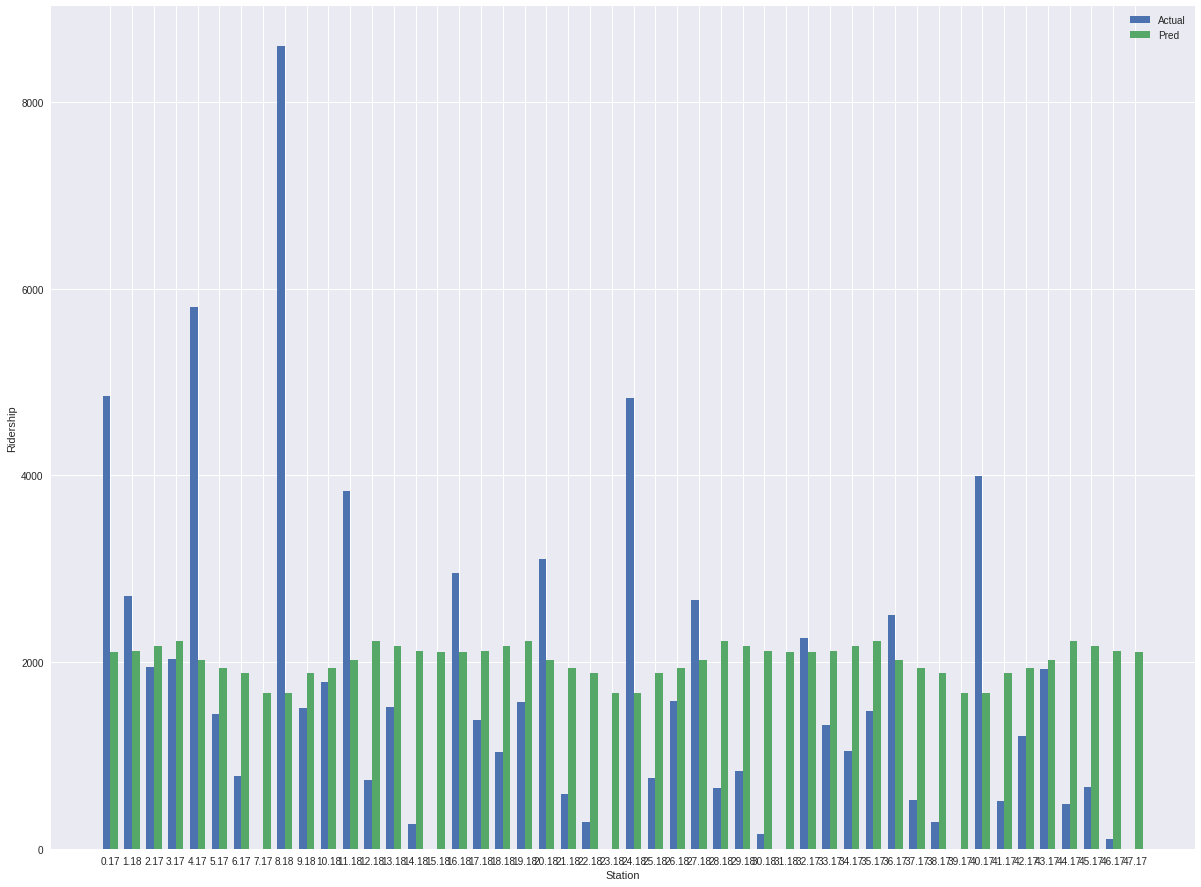

svr rbf r^2: -0.033814275428011076
MSE r^2: 3045224.213658867


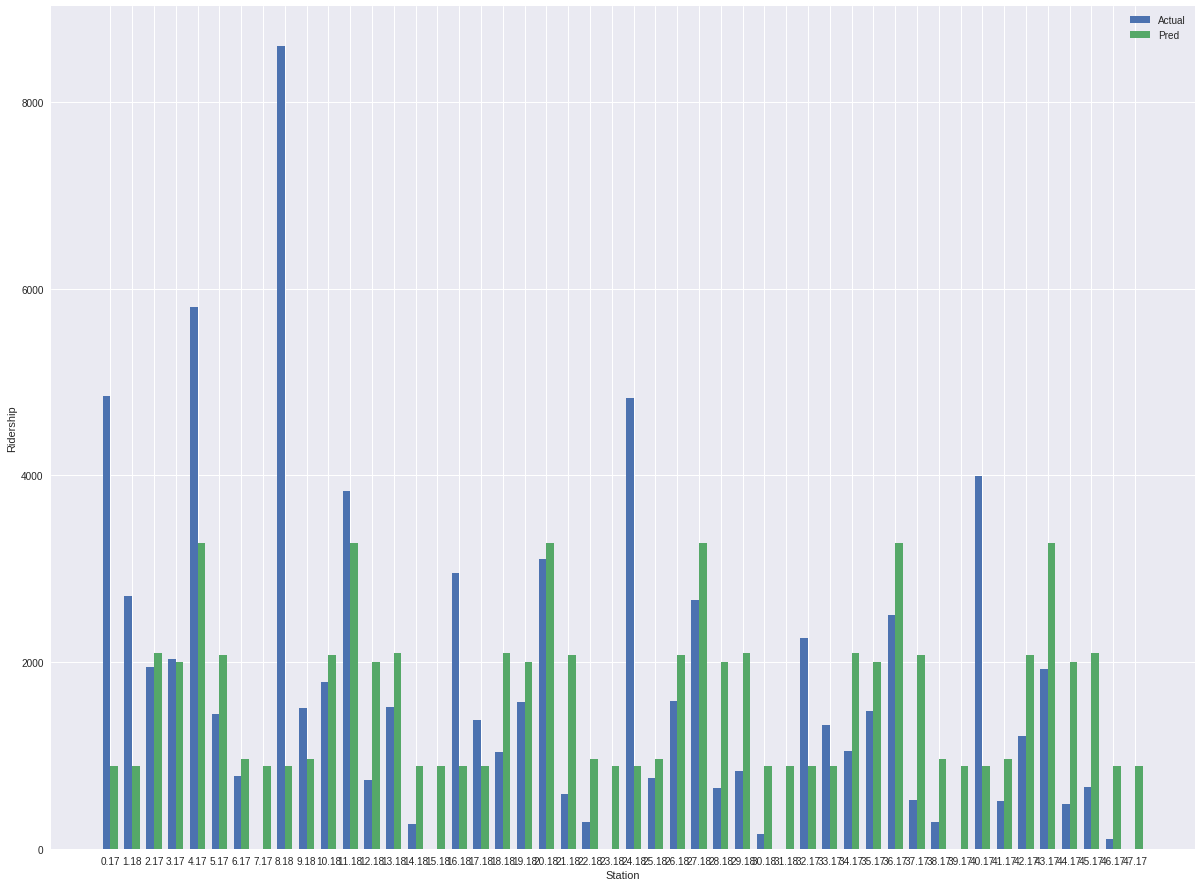

XGBoost r^2: -0.31615781935005605
MSE r^2: 3876901.060223691


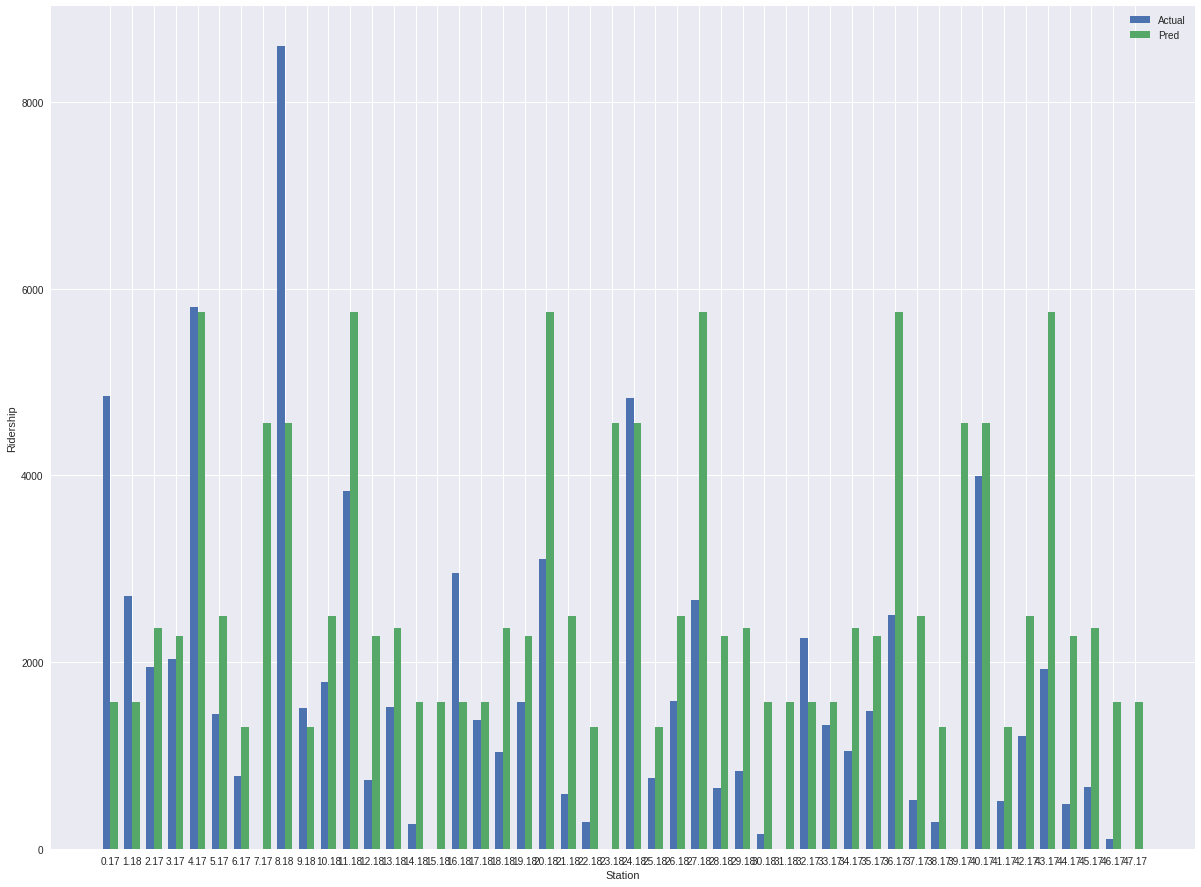

In [0]:


# Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
 
print("Linear Regression r^2:",metrics.r2_score(y_test, y_pred))
print("MSE r^2:",metrics.mean_squared_error(y_test, y_pred))


fig, ax = plt.subplots()

index = np.arange(len(x_test_stations))
print(len(index))
bar_width=0.35

rects1 = ax.bar(index, y_test,  bar_width, label='Actual')
rects2 = ax.bar(index +  bar_width, y_pred,  bar_width, label='Pred')

ax.set_xlabel('Station')
ax.set_ylabel('Ridership')
ax.set_xticks(index+bar_width/2)
ax.legend()

fig.set_size_inches(20.5, 15.5)
plt.show()

# Support Vector Regression
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

svr_rbf.fit(x_train,y_train)
y_pred = svr_rbf.predict(x_test)
print("svr rbf r^2:",metrics.r2_score(y_test, y_pred))
print("MSE r^2:",metrics.mean_squared_error(y_test, y_pred))

fig, ax = plt.subplots()

index = np.arange(len(x_test_stations))
bar_width=0.35

rects1 = ax.bar(index, y_test,  bar_width, label='Actual')
rects2 = ax.bar(index +  bar_width, y_pred,  bar_width, label='Pred')

ax.set_xlabel('Station')
ax.set_ylabel('Ridership')
ax.set_xticks(index+bar_width/2)
ax.legend()

fig.set_size_inches(20.5, 15.5)
plt.show()
'''
svr_lin.fit(x_train,y_train)
y_pred = svr_lin.predict(x_test)
print("svr lin r^2:",metrics.r2_score(y_test, y_pred))

svr_poly.fit(x_train,y_train)
y_pred = svr_poly.predict(x_test)
print("svr poly r^2:",metrics.r2_score(y_test, y_pred))
'''
# XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
print("XGBoost r^2:",metrics.r2_score(y_test, y_pred))
print("MSE r^2:",metrics.mean_squared_error(y_test, y_pred))


fig, ax = plt.subplots()

index = np.arange(len(x_test_stations))
bar_width=0.35

rects1 = ax.bar(index, y_test,  bar_width, label='Actual')
rects2 = ax.bar(index +  bar_width, y_pred,  bar_width, label='Pred')

ax.set_xlabel('Station')
ax.set_ylabel('Ridership')
ax.set_xticks(index+bar_width/2)
ax.legend()

fig.set_size_inches(20.5, 15.5)
plt.show()
